
## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

#TAREA REALIZADA EN PAREJAS ANNY ZURLEY DIOSSA Y SARA CARVAJAL#


## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

In [ ]:
#Se importan las librerías que se usarán en los programas siguientes
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
import math as mt
from IPython.display import clear_output
from time import sleep
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
#Se escribe de tres formas diferentes la misma función
def fx_1(r,x):
    f1 = r*x*(1-x) 
    return f1 

def fx_2(r,x):
    f2 = r*(x - (x**2)) 
    return f2

def fx_3(r,x):
    f3 = r*(x**2)*(x**(1/2) - 1)
    return f3

#Se define una función que grafique los resultados de las tres funciones
def caos(N,r,x0):

#Se realizan arreglos con los datos obtenidos en cada función    
    ite = np.arange(N)
    
    f_1 = np.zeros(N)
    f_2 = np.zeros(N)
    f_3 = np.zeros(N)
    
    a = x0
    b = x0
    c = x0
    
    for i in range(N):
        a = fx_1(r,a)
        f_1[i] = a
        
        
        b = fx_2(r,b)
        f_2[i] = b
       
        
        c = fx_1(r,c)
        f_3[i] = c
        
#Se definen los parámetros para realizar los gráficos    
    fig = plt.figure(figsize = (10, 8))
    gs = gridspec.GridSpec(nrows = 3, ncols = 1, height_ratios = [1, 1, 1])

    ax0 = fig.add_subplot(gs[0, 0])
    ax0.plot(ite,f_1, "D-b", markersize = 4, lw = 1,    label = "$f(x)=rx_n(1-x_n)$")
    ax0.set_ylabel("$f_1(x)$",  fontsize=20)
    ax0.set_xlabel("$n$",  fontsize=20)
    ax0.legend(fontsize = 20, loc = 0)


    ax1 = fig.add_subplot(gs[1, 0])
    ax1.plot(ite, f_2,  "v-g", lw = 3, label = "$f(x)=r(x_n - (x_n)^2)$")
    ax1.set_ylabel("$f_2(x)$",  fontsize = 20)
    ax1.set_xlabel("$n$",  fontsize = 20)
    ax1.legend(fontsize = 20, loc = 1)

    ax2 = fig.add_subplot(gs[2, 0])
    ax2.plot(ite, f_3, "o-r", label = "$f(x)=rx_n^2(x_n^{1/2} - 1) $")
    ax2.set_ylabel("$f_3(x)$", fontsize = 20)
    ax2.set_xlabel("$n$",  fontsize = 20)
    ax2.legend(fontsize = 20, loc = 2)
    
    fig.show()

In [ ]:
#Se realizan las graficas interactivas con N=100, r valores en [0,4] y x0 valores en [0,1]
interactive_plot = interactive(caos,N=(100,100), r=(0,4,0.1), x0=(0, 1,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=100, description='N', min=100), FloatSlider(value=2.0, description='r', …

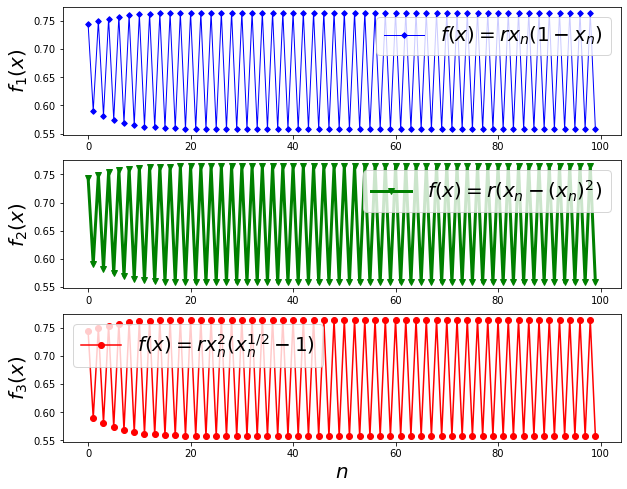

In [ ]:
#Grafico para mirar cuando N=1000, r=3.1 y x0=0,6
caos (100,3.1,0.6)